In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('../.dataset/train.csv')
df_test = pd.read_csv('../.dataset/test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-null  int64  
 11  heart_rate                

In [4]:
df_train.sample(10)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
625441,625441,40,1,49,3.5,8.1,5.3,25.2,0.85,109,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,0,0,0.0
146686,146686,36,1,107,8.4,6.0,5.3,23.3,0.82,107,...,Female,White,Postgraduate,Lower-Middle,Never,Retired,0,0,0,0.0
395358,395358,44,2,51,7.8,7.3,4.3,23.0,0.84,92,...,Female,White,Highschool,Middle,Former,Employed,0,0,0,1.0
435906,435906,34,2,92,4.9,8.0,4.3,26.1,0.92,113,...,Female,White,Postgraduate,Upper-Middle,Never,Employed,0,1,0,1.0
114199,114199,42,2,40,7.1,6.6,9.4,26.3,0.89,123,...,Male,Black,Highschool,Middle,Never,Employed,0,0,0,1.0
688539,688539,37,1,180,4.9,6.4,8.1,24.9,0.85,114,...,Female,Hispanic,Graduate,Middle,Former,Employed,0,0,0,0.0
449676,449676,41,2,97,6.5,9.5,7.7,26.9,0.86,118,...,Female,Black,Highschool,Middle,Never,Employed,0,0,0,0.0
195030,195030,57,2,50,6.8,7.7,7.0,26.9,0.89,118,...,Male,White,Highschool,Middle,Never,Employed,0,0,0,0.0
684763,684763,40,1,71,7.1,8.5,10.1,24.5,0.86,106,...,Male,White,Graduate,Low,Never,Employed,0,0,0,1.0
208387,208387,40,2,18,6.1,7.6,11.2,19.5,0.79,111,...,Female,Hispanic,Graduate,Upper-Middle,Never,Unemployed,0,0,0,1.0


In [5]:
df_train.duplicated().sum()

np.int64(0)

In [6]:
# df_train.isnull().sum()/
df_train.isna().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


In [7]:
from phik import report 

phik_matrix = df_train.phik_matrix()

interval columns not set, guessing: ['id', 'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']


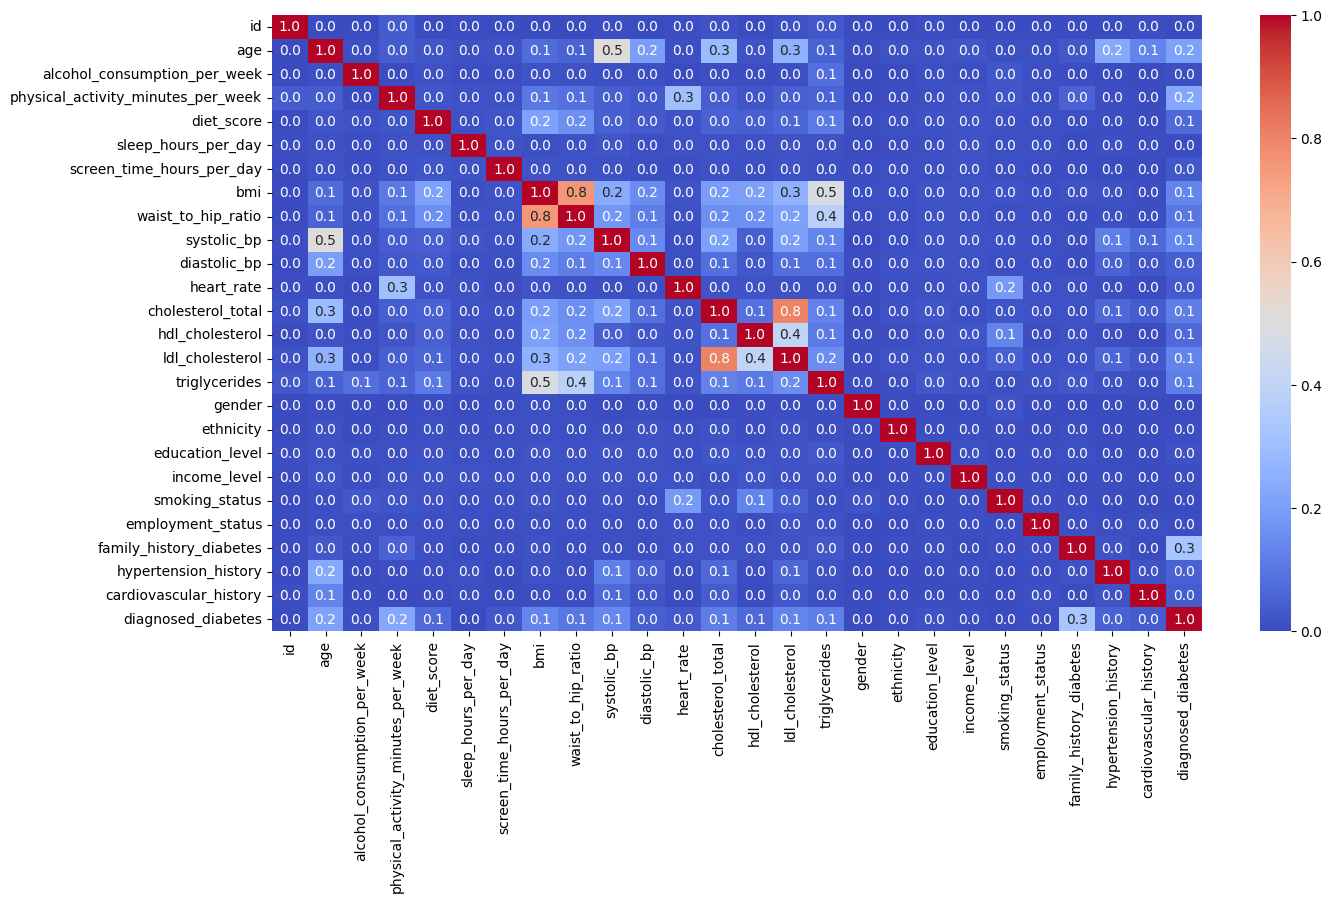

In [8]:
plt.figure(figsize=(15, 8))

sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

In [9]:
corr_matrix = df_train.corr(numeric_only=True)

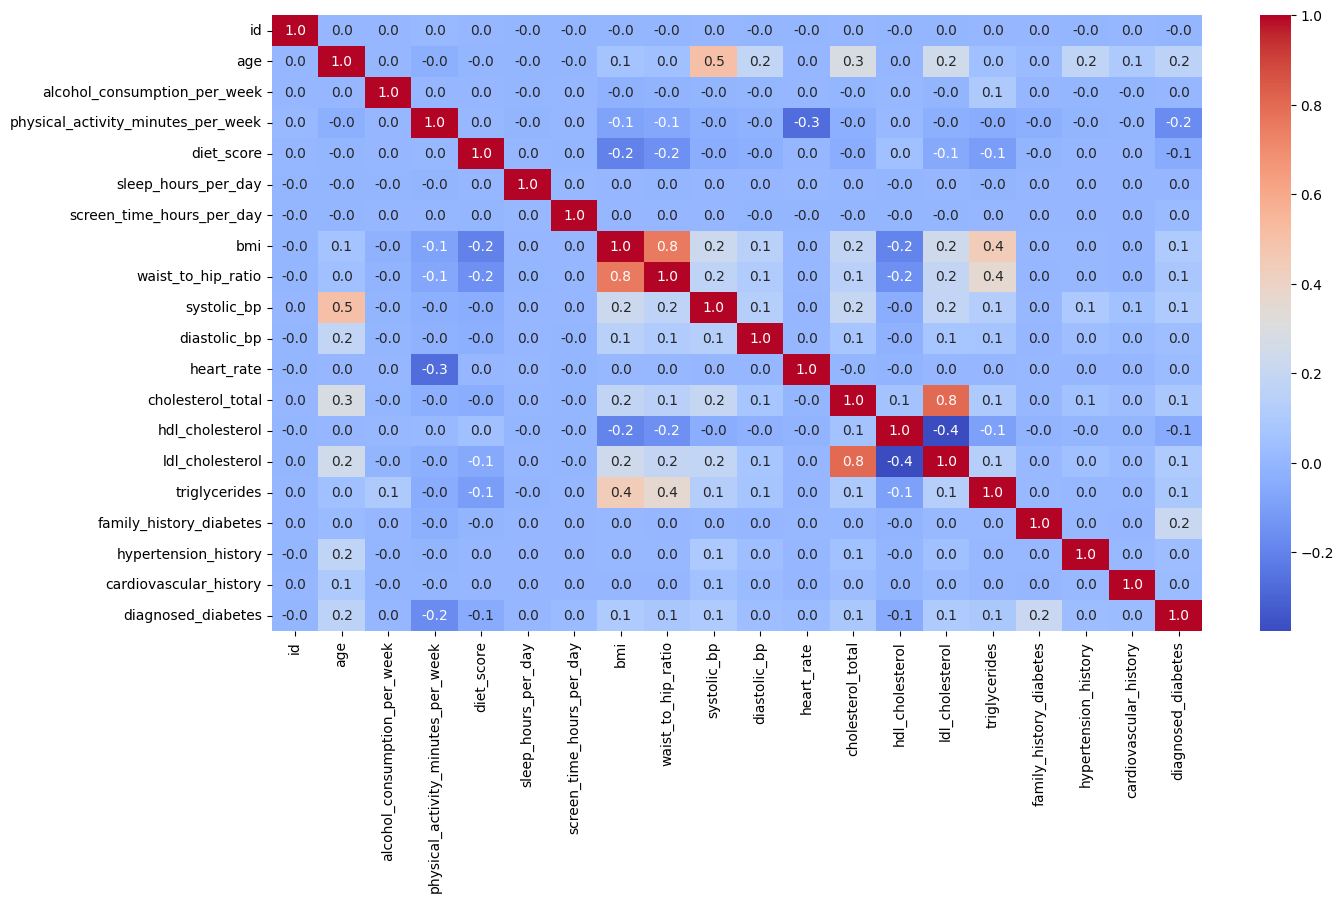

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.1f' )
plt.show()

In [11]:
df_train['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [12]:
df_train['ethnicity'].unique()

array(['Hispanic', 'White', 'Asian', 'Black', 'Other'], dtype=object)

In [13]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

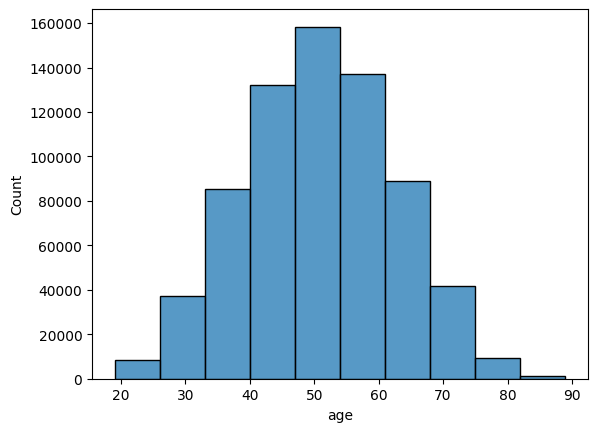

In [14]:
sns.histplot(data=df_train['age'], bins=10)
plt.show()

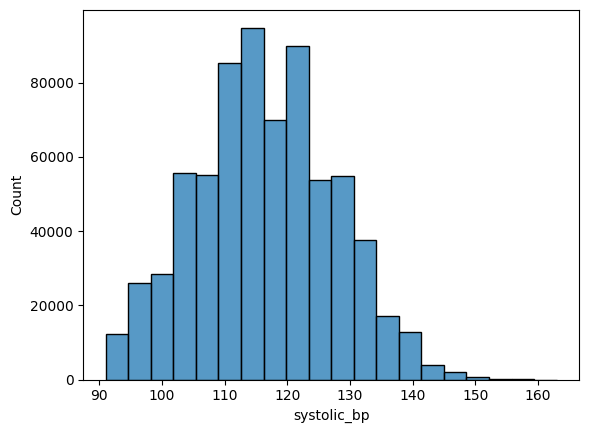

In [15]:
sns.histplot(data=df_train['systolic_bp'], bins=20)
plt.show()

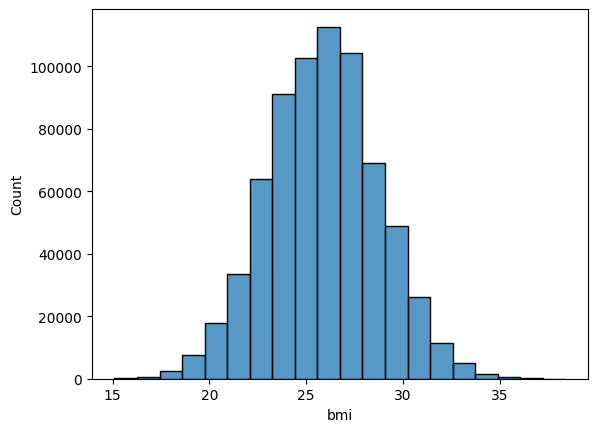

In [16]:
sns.histplot(data=df_train['bmi'], bins=20)
plt.show()

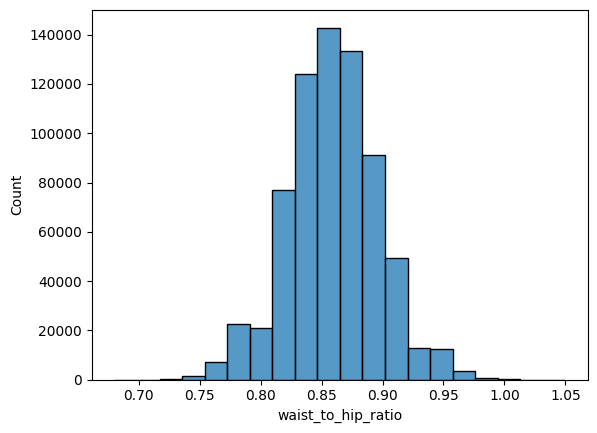

In [17]:
sns.histplot(data=df_train['waist_to_hip_ratio'],bins=20)
plt.show()

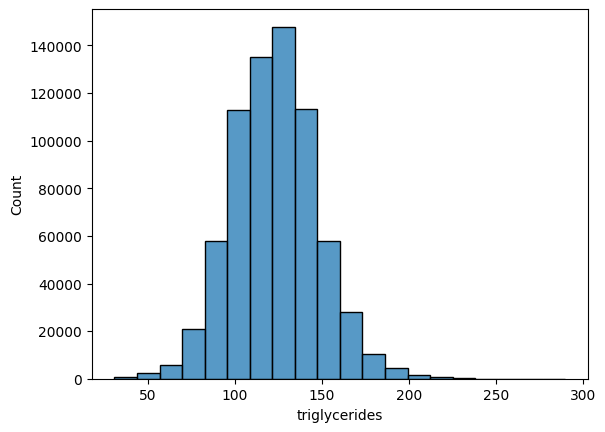

In [18]:
sns.histplot(data=df_train['triglycerides'], bins=20)
plt.show()

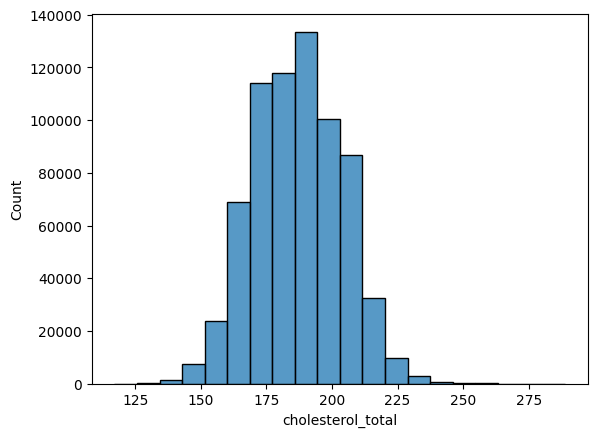

In [19]:
sns.histplot(data=df_train['cholesterol_total'], bins=20)
plt.show()

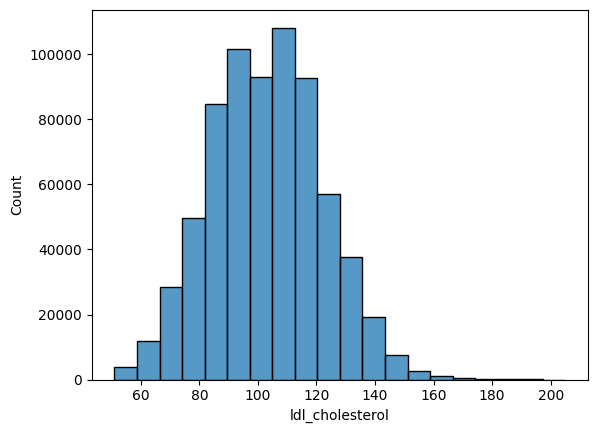

In [20]:
sns.histplot(df_train['ldl_cholesterol'], bins=20)
plt.show()

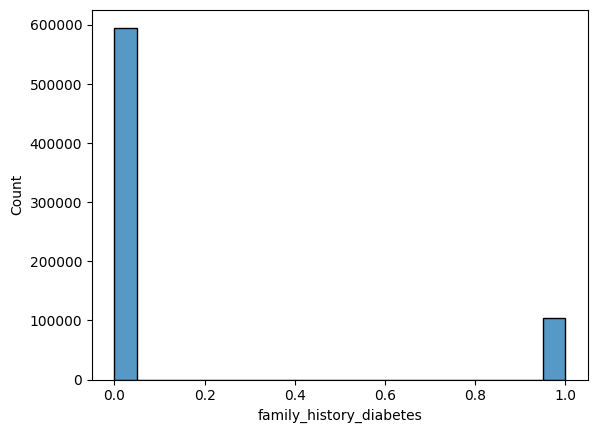

In [21]:
sns.histplot(df_train['family_history_diabetes'], bins=20)
plt.show()

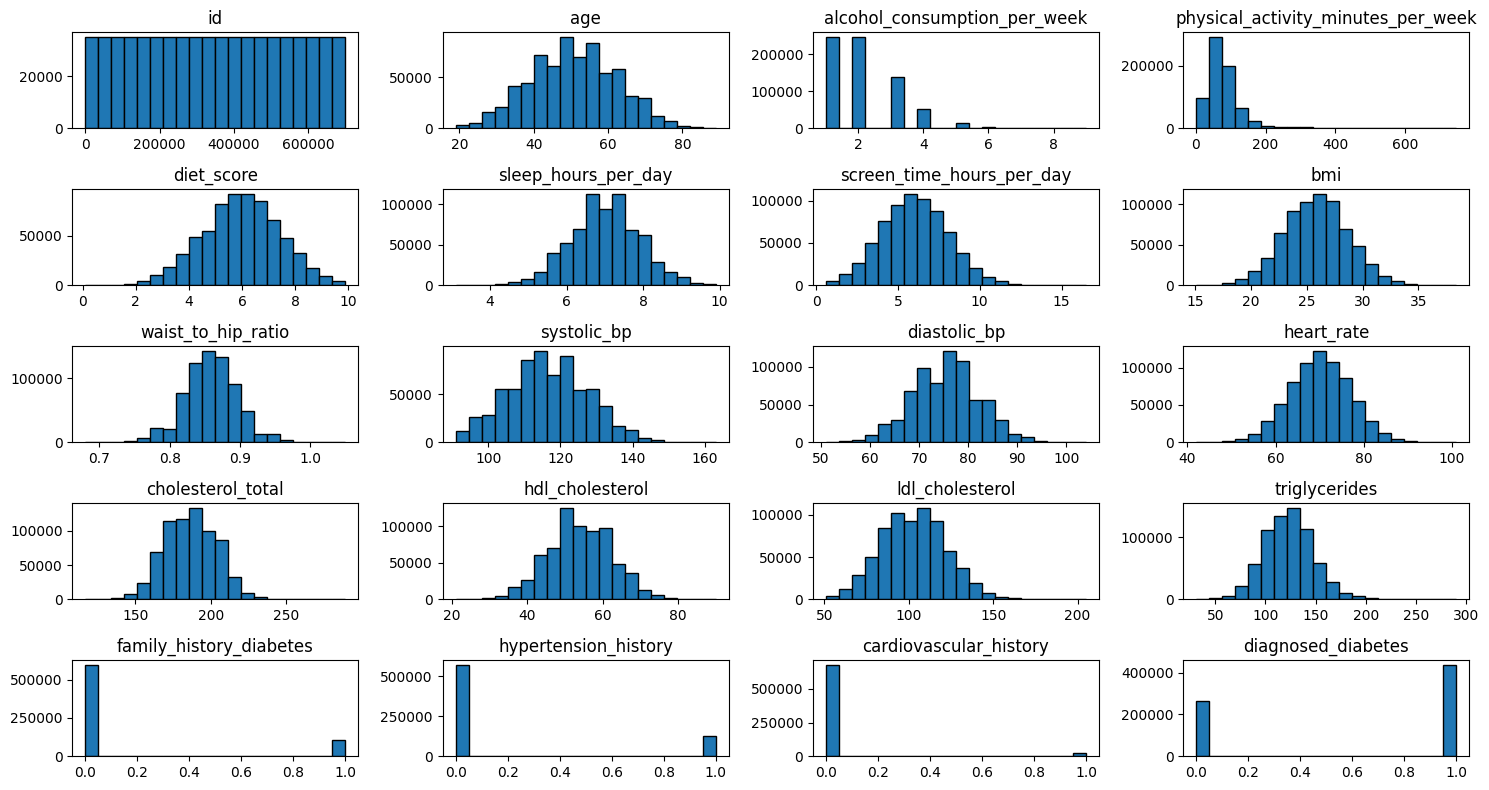

In [22]:
numeric_features = df_train.select_dtypes(include='number')

numeric_features.hist(figsize=(15,8), bins=20, edgecolor='black' , grid=False)
plt.tight_layout()
plt.show()

In [23]:
# remove outliers 
# skewing the features 
# encoding features 


In [24]:
target_corr = df_train.corr(numeric_only=True)['diagnosed_diabetes'].abs()

threshold = 0.1

features_to_keep = target_corr[target_corr > threshold].index.tolist()

final_df = df_train[features_to_keep].copy()

In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 7 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 700000 non-null  int64  
 1   physical_activity_minutes_per_week  700000 non-null  int64  
 2   bmi                                 700000 non-null  float64
 3   systolic_bp                         700000 non-null  int64  
 4   ldl_cholesterol                     700000 non-null  int64  
 5   family_history_diabetes             700000 non-null  int64  
 6   diagnosed_diabetes                  700000 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 37.4 MB


In [26]:
final_df.sample(10)

,age,physical_activity_minutes_per_week,bmi,systolic_bp,ldl_cholesterol,family_history_diabetes,diagnosed_diabetes
362519,35,104,27.4,112,118,0,0.0
168020,66,60,26.1,124,123,0,0.0
522370,62,110,24.0,119,104,0,1.0
462282,47,30,29.0,103,111,0,1.0
427466,71,118,27.3,125,97,0,1.0
603680,35,65,29.1,122,113,0,1.0
294544,40,109,24.7,112,125,0,0.0
312643,47,40,23.5,112,107,0,0.0
137645,47,98,22.7,101,102,0,0.0
210946,70,18,27.2,110,85,1,1.0


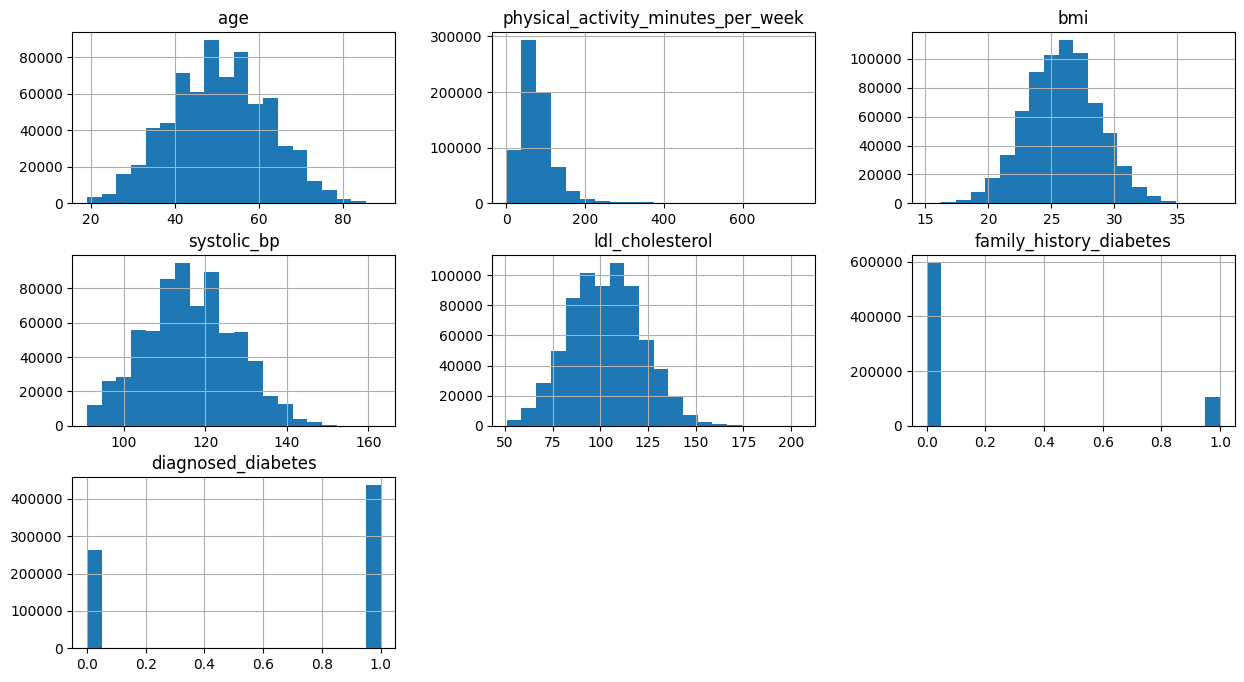

In [27]:
final_df.hist(bins=20, figsize=(15,8))
plt.show()

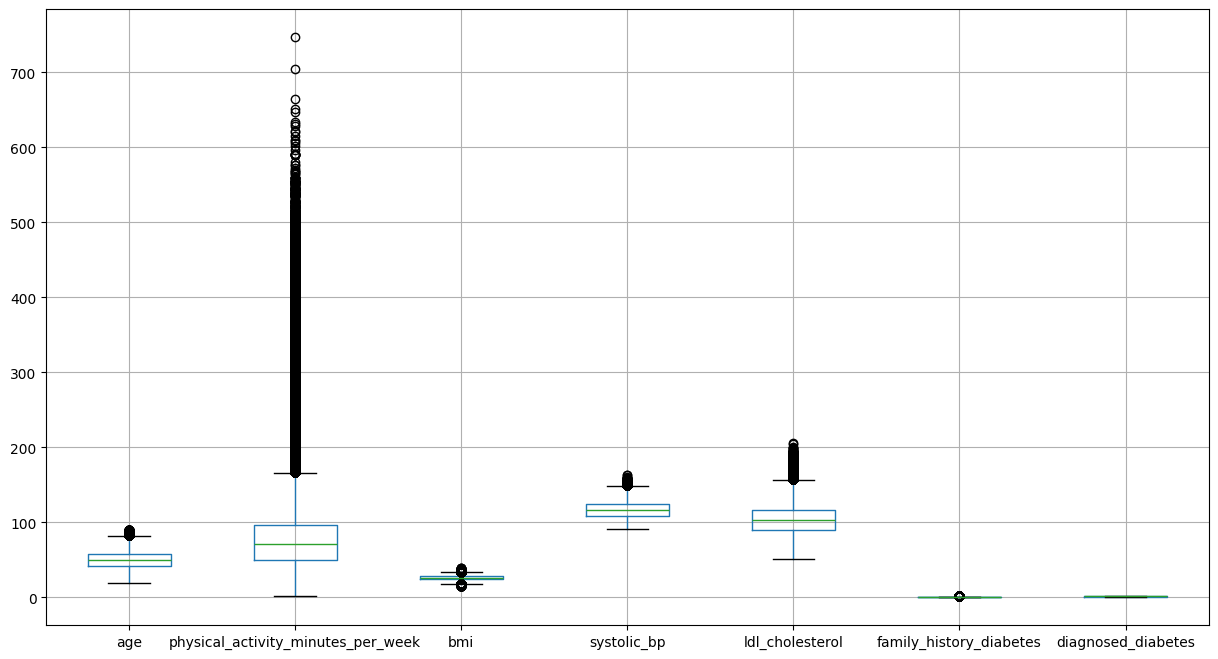

In [28]:
final_df.boxplot(figsize=(15,8))
plt.show()

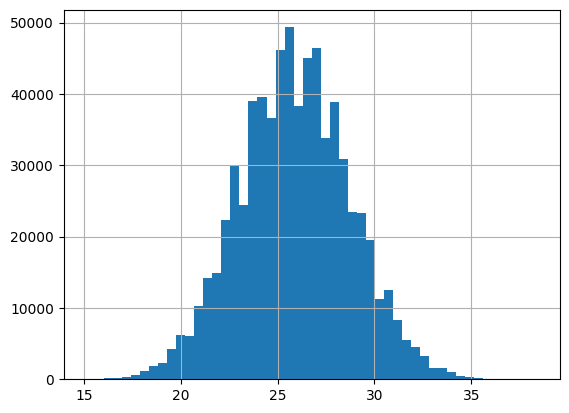

In [29]:
final_df['bmi'].hist(bins=50)
plt.show()

In [30]:
final_df['physical_activity_minutes_per_week'] = np.log1p(final_df['physical_activity_minutes_per_week'])

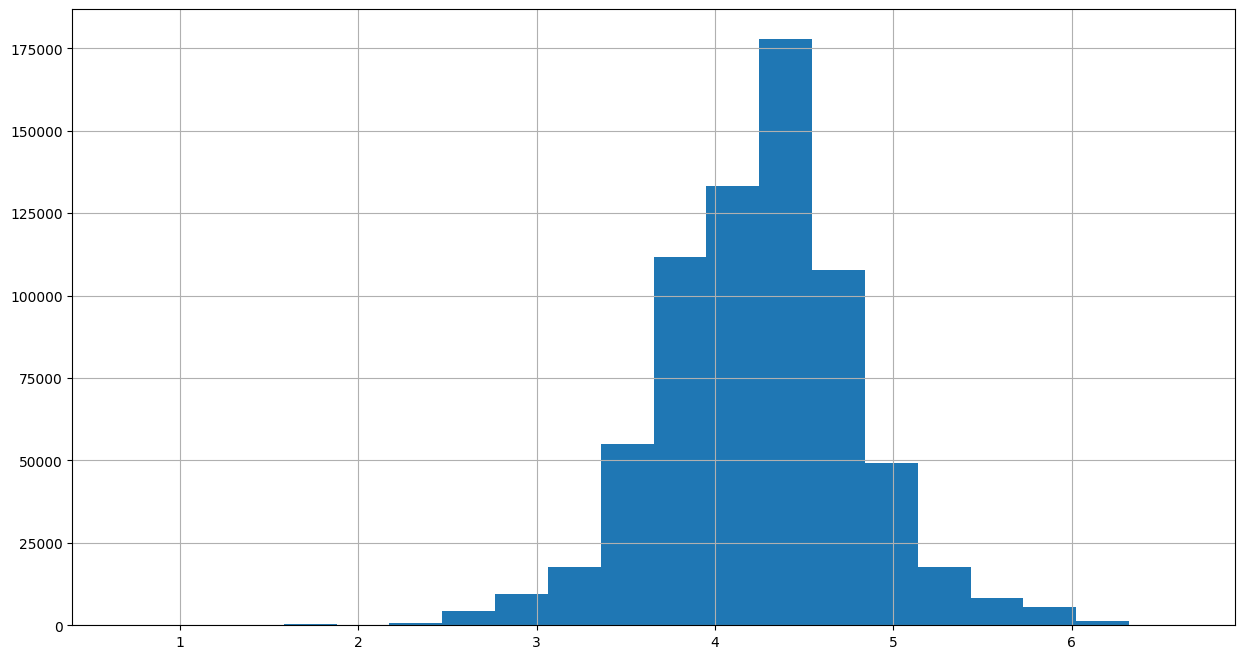

In [31]:
final_df['physical_activity_minutes_per_week'].hist(figsize=(15,8), bins=20)
plt.show()

In [32]:
final_df.columns

Index(['age', 'physical_activity_minutes_per_week', 'bmi', 'systolic_bp',
       'ldl_cholesterol', 'family_history_diabetes', 'diagnosed_diabetes'],
      dtype='object')

In [33]:
independent_features = ['age', 'physical_activity_minutes_per_week', 'bmi', 'systolic_bp',
       'ldl_cholesterol', 'family_history_diabetes']

dependent_feature = ['diagnosed_diabetes']

X_train = final_df[independent_features]
Y_train = final_df[dependent_feature]

In [35]:
X_test = df_test[independent_features]
df_id = df_test['id']

In [36]:
print(f"skew of final_df['physical_activity_minutes_per_week'] : {final_df['physical_activity_minutes_per_week'].skew()}") 
print(f"skew of final_df['age']: {final_df['age'].skew()}")
print(f"skew of final_df['bmi']: {final_df['bmi'].skew()}")
print(f"skew of final_df['family_history_diabetes']: {final_df['family_history_diabetes'].skew()}")
print(f"skew of final_df['ldl_cholesterol']: {final_df['ldl_cholesterol'].skew()}")
print(f"skew of final_df['systolic_bp']: {final_df['systolic_bp'].skew()}")

skew of final_df['physical_activity_minutes_per_week'] : -0.0511819835003101
skew of final_df['age']: 0.0209047954127797
skew of final_df['bmi']: 0.03210674326198535
skew of final_df['family_history_diabetes']: 1.9669864529713836
skew of final_df['ldl_cholesterol']: 0.13230062544051005
skew of final_df['systolic_bp']: 0.09720797341508045


In [37]:
from xgboost import XGBClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report , accuracy_score
from sklearn.model_selection import GridSearchCV

In [38]:
XG_pipeline = Pipeline([
    ('scaler',RobustScaler()),
    ('model', XGBClassifier(use_label_encoder=False , eval_metric='logloss' ))
])

xgb_param_grid = {
    'model__n_estimators':[100, 200],
    'model__max_depth': [3,5,7],
    'model__learning_rate': [0.01, 0.1 , 0.2]
}

xgb_grid = GridSearchCV(XG_pipeline , xgb_param_grid , cv=5 , scoring='f1' , n_jobs=-1)
xgb_grid.fit(X_train , Y_train )

d:\github_projects\diabetes_preddiction\.env\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:28:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","Pipeline(step...=None, ...))])"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__learning_rate': [0.01, 0.1, ...], 'model__max_depth': [3, 5, ...], 'model__n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate 

In [39]:
lr_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', LogisticRegression())
])

lr_pram_grid = {
    'model__C': [0.01 , 0.1 , 1, 10 ,100],
    'model__penalty': ['l2']
}

lr_grid = GridSearchCV(lr_pipeline , lr_pram_grid , cv=5 , scoring='f1')
lr_grid.fit(X_train, Y_train)

d:\github_projects\diabetes_preddiction\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
d:\github_projects\diabetes_preddiction\.env\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\github_projects\diabetes_preddiction\.env\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_rati

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...egression())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__C': [0.01, 0.1, ...], 'model__penalty': ['l2']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 :

In [43]:
results_summary = pd.DataFrame({
    'Model': ['XGBoost', 'Logistic Regression'],
    'Best_F1_Score': [
        xgb_grid.best_score_,
        lr_grid.best_score_
    ],
    'Best_Params':[
        xgb_grid.best_params_,
        lr_grid.best_params_
        
    ]
})

results_summary = results_summary.sort_values(by='Best_F1_Score', ascending=False)
best_model_name = results_summary.iloc[0]['Model']

print(results_summary)

print(f"best model is : {best_model_name}")


                 Model  Best_F1_Score  \
0              XGBoost       0.773800   
1  Logistic Regression       0.758035   

                                         Best_Params  
0  {'model__learning_rate': 0.01, 'model__max_dep...  
1         {'model__C': 0.01, 'model__penalty': 'l2'}  
best model is : XGBoost


In [44]:
if best_model_name == 'XGBoost':
    best_model = xgb_grid.best_estimator_
elif best_model_name == 'Logistic Regression':
    best_model = lr_grid.best_estimator_


In [ ]:
y_pred = best_model.predict_proba(X_test)[: ,1]

sumbmission = pd.DataFrame({
    'id': df_id,
    'diagnosed_diabetes': y_pred
})

sumbmission.to_csv('diabetes_submission.csv', index=False)

sumbmission.head(10)

,id,diagnosed_diabetes
0,700000,0.396586
1,700001,0.370966
2,700002,0.402331
3,700003,0.433165
4,700004,0.544991
5,700005,0.387324
6,700006,0.485937
7,700007,0.695564
8,700008,0.428626
9,700009,0.408057


In [50]:
import joblib
joblib.dump(best_model, '../models/diabetes_model.pkl')

['../models/diabetes_model.pkl']